In [1]:
from dataset import MultiModalDataset
import PIL
import matplotlib.pyplot as plt
from mmaction.datasets import build_dataset
import torch

/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Load annotations

In [2]:
train_dataset = MultiModalDataset(ann_file='../../../../data/wlasl/train_annotations.txt',
                                  root_dir='../../../../data/wlasl/rawframes',
                                  clip_len=32,
                                  resolution=224,
                                  transforms=None,
                                  frame_interval=1,
                                  num_clips=1
                                  )

In [3]:
dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=2,
                                                shuffle=False,
                                                num_workers=2,
                                                pin_memory=True)

In [16]:
iter_ = iter(dataloader)
batch = next(iter_)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


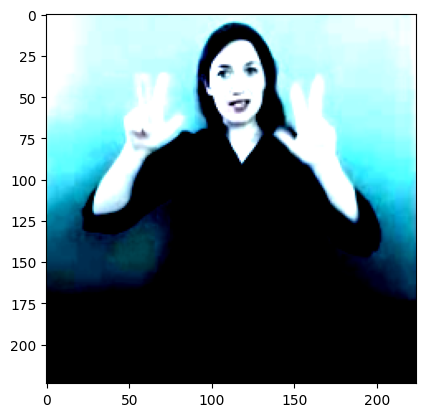

In [20]:
imshow(batch[0][0])

In [4]:
results = train_dataset.load_video(0)

In [5]:
results

{'video_path': '../../../../data/wlasl/rawframes/train/05237',
 'start_index': 1,
 'total_frames': 55,
 'label': 77,
 'frame_inds': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 'clip_len': 32,
 'frame_interval': 1,
 'num_clips': 1,
 'rgb': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=

In [6]:
images = results['rgb']

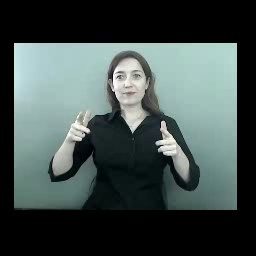

In [7]:
display(images[0])

In [8]:
def imshow(tensor, idx=0):
    plt.imshow(tensor.permute(1, 2, 3, 0)[idx])

## Load Pose

In [9]:
tensor_imgs = train_dataset.to_3dtensor(images)

In [10]:
tensor_imgs.shape

torch.Size([3, 32, 224, 224])

In [11]:
from pipelines.normalise import Normalise

In [12]:
normalise = Normalise([0.4831, 0.4542, 0.4044], [0.2281, 0.2231, 0.2231])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


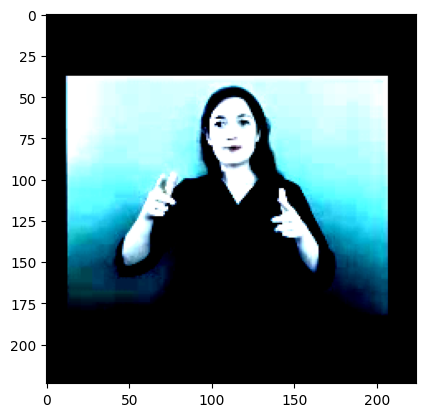

In [13]:
imshow(normalise(tensor_imgs))

In [14]:
transform = transforms.Compose([transforms.RandomResizedCrop(size=(224), scale=(0.4, 1.0)),
                                transforms.RandomHorizontalFlip(p=0)]
                            )

NameError: name 'transforms' is not defined

In [ ]:
import mmcv
import numpy as np

In [ ]:
imgs = flipped.permute(1,0,2,3)

In [ ]:
imgs.shape

In [ ]:
imshow(imgs.permute(1,0,2,3))

In [ ]:
def normalise(image):
    stdinv = 1/std

    image = image-mean
    image = image*stdinv

    return image

In [ ]:
mean=np.array([0.4831, 0.4542, 0.4044]).reshape(-1,1,1)
std=np.array([0.2281, 0.2231, 0.2231]).reshape(-1,1,1)

In [ ]:
tensor_imgs.shape

In [ ]:
img_array = np.array(tensor_imgs.permute(1,0,2,3))

In [ ]:
n = len(img_array)
c, h, w = img_array[0].shape

In [ ]:
n,c,h,w

In [ ]:
img_ = np.empty((n,c,h,w))

for i, img in enumerate(img_array):
    img_[i] = normalise(img)
    
out = torch.tensor(img_)

In [ ]:
out.shape

In [ ]:
imshow(out.permute(1,0,2,3))

In [ ]:
mmcv.imnormalize_(test, mean, std, False)

In [ ]:
plt.imshow(img)

In [ ]:
normalised.shape

In [ ]:
normalised = torch.tensor(normalised)

In [ ]:
normalised.shape

In [ ]:
transformed = normalised.permute(3,0,1,2)

In [ ]:
transformed.shape

In [ ]:
imshow(transformed, 5)

In [ ]:
normalised.max()

In [ ]:
normalised.shape

In [ ]:
# Set up dataset
train_cfg = dict(
    type='RawframeDataset',
    ann_file='../../../../data/wlasl/train_annotations.txt',
    data_prefix='../../../../data/wlasl/rawframes',
    pipeline=[
        dict(
            type='SampleFrames',
            clip_len=32,
            frame_interval=2,
            num_clips=1),
        dict(type='RawFrameDecode'),
        dict(type='Resize', scale=(-1, 256)),
        dict(type='RandomResizedCrop', area_range=(0.4, 1.0)),
        dict(type='Resize', scale=(224, 224), keep_ratio=False),
        dict(type='Flip', flip_ratio=0.5),
        dict(
            type='Normalize',
            mean=[123.675, 116.28, 103.53],
            std=[58.395, 57.12, 57.375],
            to_bgr=False),
        dict(type='FormatShape', input_format='NCTHW'),
        dict(type='Collect', keys=['imgs', 'label'], meta_keys=[]),
        dict(type='ToTensor', keys=['imgs', 'label'])
    ])
mmcv_dataset = build_dataset(train_cfg)

mmcv_train_loader = torch.utils.data.DataLoader(dataset=mmcv_dataset,
                                                batch_size=1,
                                                shuffle=False,
                                                num_workers=2,
                                                pin_memory=True)

In [ ]:
img_iter = iter(mmcv_train_loader)

In [ ]:
x = next(img_iter)

In [ ]:
mmcv_imgs = x['imgs']

In [ ]:
mmcv_imgs.shape

In [ ]:
mmcv_imgs.min()

In [ ]:
imshow(mmcv_imgs.squeeze(), 0)

In [ ]:
results

In [ ]:
results = sampleframes(results)

In [ ]:
results

## Load frames

In [ ]:
from PIL import Image

In [ ]:
frame_indices = results['frame_inds']

In [ ]:
frame = frame_indices[0]

In [ ]:
image = Image.open(osp.join(video_path, depth_prefix.format(frame)))

In [ ]:
rgb_frames = []
flow_frames = []
depth_frames = []
cache = dict()

for frame in frame_indices:
    if frame not in cache:
        rgb_frame = Image.open(osp.join(video_path, rgb_prefix.format(frame)))
        depth_frame = Image.open(osp.join(video_path, depth_prefix.format(frame)))
        flow_frame = Image.open(osp.join(video_path, flow_prefix.format(frame)))
        
        # Add frames to cache
        cache[frame] = dict(rgb_frame=rgb_frame,
                           depth_frame=depth_frame,
                           flow_frame=flow_frame)
        
        rgb_frames.append(rgb_frame)
        depth_frames.append(depth_frame)
        flow_frames.append(flow_frame)
        
    else:
        rgb_frames.append(cache[frame][rgb_frame])
        depth_frames.append(cache[frame][depth_frame])
        flow_frames.append(cache[frame][flow_frame])
        
